
---
# **CUSTOMER LIFETIME VALUE (CLV)**
---
# **PART.1**
### **1. Data Preperation**
### **2. Average Order Value**
*   ### average_order_value = total_price /total_transaction 

### **3. Purchase Frequency** 
*   ### total_transaction / total_number_of_customers

### **4. Repeat Rate & Churn Rate** 

### **5. Profit Margin** 
*   ### profit_margin =  total_price * 0.10

### **6. Customer Value** 
*   ### customer_value = average_order_value * purchase_frequency

### **7. Customer Lifetime Value** 
*   ### CLTV = (customer_value / churn_rate) x profit_margin

### **8. Creating Segments**

### **9. Functionalization - I**
# **PART.2**
### **10. Expected Number of Transaction with BG-NBD Model**

### **11. Expected Average Profit with Gamma-Gamma Model**

### **12. Calculation of CLTV with BG-NBD and Gamma-Gamma Model**

### **13. Creating Segments by CLTV**

### **14. Functionalization - II**



---
# **PART.1**
---


# **1. Data Preperation**

### https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

### The dataset named Online Retail II includes the sales of an UK-based online store between 01/12/2009 - 09/12/2011.

## **Variables**
###Information on the data contained in the variables in the dataset is given below.
### **InvoiceNo:** Invoice number. The unique number of each transaction, namely the invoice. Aborted operation if it starts with C.
### **StockCode:** Product code. Unique number for each product.
### **Description:** Product name
### **Quantity:** Number of products. It expresses how many of the products on the invoices have been sold.
### **InvoiceDate:** Invoice date and time.
### **UnitPrice:** Product price (in GBP)
### **CustomerID:** Unique customer number
### **Country:** Country where the customer lives.


---



In [268]:
!pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [269]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import xtarfile as tarfile
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
from sklearn.preprocessing import MinMaxScaler

In [270]:
df_ = pd.read_excel("/content/online_retail_II_20092010.xlsx")
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom


In [271]:
#Row number of dataframe. Alternative version: len(df)
df.shape[0]

525461

In [272]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [273]:
df = df[~df["Invoice"].str.contains("C", na=False)]

### If the invoice contains the letter **"C"**, its type is **Canceled**.

### **Here is a breakdown of how the code works:**


---


### **df["Invoice"].str.contains("C", na=False)** creates a boolean mask that is True for rows where the "Invoice" column contains the letter "C", and False otherwise. The na=False parameter specifies that missing values (NaN) should be treated as False.

### **The tilde ( ~ ) operator negates the boolean mask, so it is True for rows that do not contain the letter "C", and False for rows that do contain the letter "C".**

### The boolean mask is used to index the dataframe df, so df[~ df["Invoice"].str.contains("C", na=False)] returns a new dataframe that only contains rows where the "Invoice" column **does not contain** the letter "C".

In [274]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,515255.0000,10.9566,104.3540,-9600.0000,1.0000,3.0000,10.0000,19152.0000
Price,515255.0000,3.9564,127.6886,-53594.3600,1.2500,2.1000,4.2100,25111.0900
Customer ID,407695.0000,15368.5041,1679.7957,12346.0000,13997.0000,15321.0000,16812.0000,18287.0000


In [275]:
df = df[(df['Quantity'] > 0)]

In [276]:
df.dropna(inplace=True)

In [277]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.6500,13085.0000,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.9500,13085.0000,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.5500,13085.0000,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.7500,13085.0000,United Kingdom


In [278]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [279]:
cltv_gb = df.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(),
                                        'Quantity': lambda x: x.sum(),
                                        'TotalPrice': lambda x: x.sum()})

cltv_gb.columns = ['total_transaction', 'total_unit', 'total_price']

In [280]:
cltv_gb

,total_transaction,total_unit,total_price
Customer ID,,,
12346.0000,11,70,372.8600
12347.0000,2,828,1323.3200
12348.0000,1,373,222.1600
12349.0000,3,993,2671.1400
12351.0000,1,261,300.9300
...,...,...,...
18283.0000,6,336,641.7700
18284.0000,1,494,461.6800
18285.0000,1,145,427.0000


---
# **2. Average Order Value (average_order_value = total_price / total_transaction)**


In [281]:
cltv_gb.head()
cltv_gb["average_order_value"] = cltv_gb["total_price"] / cltv_gb["total_transaction"]
cltv_gb

,total_transaction,total_unit,total_price,average_order_value
Customer ID,,,,
12346.0000,11,70,372.8600,33.8964
12347.0000,2,828,1323.3200,661.6600
12348.0000,1,373,222.1600,222.1600
12349.0000,3,993,2671.1400,890.3800
12351.0000,1,261,300.9300,300.9300
...,...,...,...,...
18283.0000,6,336,641.7700,106.9617
18284.0000,1,494,461.6800,461.6800
18285.0000,1,145,427.0000,427.0000


---
# **3. Purchase Frequency (total_transaction / total_number_of_customers)**


In [282]:
cltv_gb["purchase_frequency"] = cltv_gb["total_transaction"] / cltv_gb.shape[0]
cltv_gb

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency
Customer ID,,,,,
12346.0000,11,70,372.8600,33.8964,0.0025
12347.0000,2,828,1323.3200,661.6600,0.0005
12348.0000,1,373,222.1600,222.1600,0.0002
12349.0000,3,993,2671.1400,890.3800,0.0007
12351.0000,1,261,300.9300,300.9300,0.0002
...,...,...,...,...,...
18283.0000,6,336,641.7700,106.9617,0.0014
18284.0000,1,494,461.6800,461.6800,0.0002
18285.0000,1,145,427.0000,427.0000,0.0002


---

# **4. Repeat Rate & Churn Rate**


In [283]:
repeat_rate = cltv_gb[cltv_gb["total_transaction"] > 1].shape[0] / cltv_gb.shape[0]

churn_rate = 1 - repeat_rate

---

# **5. Profit Margin (profit_margin =  total_price * 0.10)**


In [284]:
cltv_gb['profit_margin'] = cltv_gb['total_price'] * 0.10
cltv_gb

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin
Customer ID,,,,,,
12346.0000,11,70,372.8600,33.8964,0.0025,37.2860
12347.0000,2,828,1323.3200,661.6600,0.0005,132.3320
12348.0000,1,373,222.1600,222.1600,0.0002,22.2160
12349.0000,3,993,2671.1400,890.3800,0.0007,267.1140
12351.0000,1,261,300.9300,300.9300,0.0002,30.0930
...,...,...,...,...,...,...
18283.0000,6,336,641.7700,106.9617,0.0014,64.1770
18284.0000,1,494,461.6800,461.6800,0.0002,46.1680
18285.0000,1,145,427.0000,427.0000,0.0002,42.7000


# **6. Customer Value (customer_value = average_order_value * purchase_frequency)**

In [285]:
cltv_gb['customer_value'] = cltv_gb['average_order_value'] * cltv_gb["purchase_frequency"]
cltv_gb

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value
Customer ID,,,,,,,
12346.0000,11,70,372.8600,33.8964,0.0025,37.2860,0.0864
12347.0000,2,828,1323.3200,661.6600,0.0005,132.3320,0.3068
12348.0000,1,373,222.1600,222.1600,0.0002,22.2160,0.0515
12349.0000,3,993,2671.1400,890.3800,0.0007,267.1140,0.6192
12351.0000,1,261,300.9300,300.9300,0.0002,30.0930,0.0698
...,...,...,...,...,...,...,...
18283.0000,6,336,641.7700,106.9617,0.0014,64.1770,0.1488
18284.0000,1,494,461.6800,461.6800,0.0002,46.1680,0.1070
18285.0000,1,145,427.0000,427.0000,0.0002,42.7000,0.0990


# **7. Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)**

In [286]:
cltv_gb["cltv"] = (cltv_gb["customer_value"] / churn_rate) * cltv_gb["profit_margin"]

cltv_gb.sort_values(by="cltv", ascending=False)

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
18102.0000,89,124216,349164.3500,3923.1949,0.0206,34916.4350,80.9375,8579573.7728
14646.0000,78,170342,248396.5000,3184.5705,0.0181,24839.6500,57.5792,4342070.4583
14156.0000,102,108107,196566.7400,1927.1249,0.0236,19656.6740,45.5648,2719105.0862
14911.0000,205,69722,152147.5700,742.1833,0.0475,15214.7570,35.2683,1629055.8098
13694.0000,94,125893,131443.1900,1398.3318,0.0218,13144.3190,30.4690,1215855.8900
...,...,...,...,...,...,...,...,...
15913.0000,1,3,6.3000,6.3000,0.0002,0.6300,0.0015,0.0028
13788.0000,1,1,3.7500,3.7500,0.0002,0.3750,0.0009,0.0010
14095.0000,1,1,2.9500,2.9500,0.0002,0.2950,0.0007,0.0006


# **8. Creating Segments**

In [287]:
cltv_gb.sort_values(by="cltv", ascending=False).tail()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
15913.0000,1,3,6.3000,6.3000,0.0002,0.6300,0.0015,0.0028
13788.0000,1,1,3.7500,3.7500,0.0002,0.3750,0.0009,0.0010
14095.0000,1,1,2.9500,2.9500,0.0002,0.2950,0.0007,0.0006
14103.0000,1,5,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000
14827.0000,1,5,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000



### **Here is a breakdown of how the code works:**


---


### **pd.qcut(cltv_c["cltv"], 4, labels=["D", "C", "B", "A"])** creates four segments of customers based on their CLTV. 
### The pd.qcut() function is used to divide the values of the "cltv" column into four **equal-sized bins**, and the labels parameter is used to assign the labels **"D", "C", "B",** and **"A"** to the four segments in ascending order.

In [288]:
cltv_gb.sort_values(by="cltv", ascending=False).tail()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
15913.0000,1,3,6.3000,6.3000,0.0002,0.6300,0.0015,0.0028
13788.0000,1,1,3.7500,3.7500,0.0002,0.3750,0.0009,0.0010
14095.0000,1,1,2.9500,2.9500,0.0002,0.2950,0.0007,0.0006
14103.0000,1,5,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000
14827.0000,1,5,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000


In [289]:
cltv_gb["segment"] = pd.qcut(cltv_gb["cltv"], 4, labels=["D", "C", "B", "A"])

In [290]:
cltv_gb.sort_values(by="cltv", ascending=False).head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
Customer ID,,,,,,,,,
18102.0000,89,124216,349164.3500,3923.1949,0.0206,34916.4350,80.9375,8579573.7728,A
14646.0000,78,170342,248396.5000,3184.5705,0.0181,24839.6500,57.5792,4342070.4583,A
14156.0000,102,108107,196566.7400,1927.1249,0.0236,19656.6740,45.5648,2719105.0862,A
14911.0000,205,69722,152147.5700,742.1833,0.0475,15214.7570,35.2683,1629055.8098,A
13694.0000,94,125893,131443.1900,1398.3318,0.0218,13144.3190,30.4690,1215855.8900,A


In [291]:
cltv_gb.groupby("segment").agg({"count", "mean", "sum"})

total_transaction               total_unit                  total_price                 average_order_value                purchase_frequency              profit_margin                customer_value                       cltv                 
                      sum count    mean        sum count      mean          sum count      mean                 sum count     mean                sum count   mean           sum count     mean            sum count   mean           sum count       mean
segment                                                                                                                                                                                                                                                   
D                    1326  1079  1.2289     117616  1079  109.0046  192265.1300  1079  178.1883         169805.4655  1079 157.3730             0.3074  1079 0.0003    19226.5130  1079  17.8188        44.5677  1079 0.0413     2849.3279  1079     2.6407
C                    2160  1078  2.0037     305135  1078  283.0566  513016.4530  1078  475.8965         317422.3551  1078 294.4549             0.5007  1078 0.0005    51301.6453  1078  47.5897       118.9190  1078 0.1103    18184.2634  1078    16.8685
B                    4063  1078  3.7690     733211  1078  680.1586 1219605.2000  1078 1131.3592         420127.1237  1078 389.7283             0.9418  1078 0.0009   121960.5200  1078 113.1359       282.7087  1078 0.2623   103549.8633  1078    96.0574
A                   11666  1079 10.8119    4383262  1079 4062.3373 6907116.4910  1079 6401.4055         723972.2235  1079 670.9659             2.7042  1079 0.0025   690711.6491  1079 640.1405      1601.0933  1079 1.4839 25257295.0412  1079 23408.0584

In [292]:
cltv_gb.to_csv("cltv_gb.csv")

# **9. Functionalization - I**

In [293]:
def cltv_Basic(dataframe, profit=0.10):

    # Data Preparation
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[(dataframe['Quantity'] > 0)]
    dataframe.dropna(inplace=True)
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    cltv_gb = dataframe.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(),
                                                   'Quantity': lambda x: x.sum(),
                                                   'TotalPrice': lambda x: x.sum()})
    cltv_gb.columns = ['total_transaction', 'total_unit', 'total_price']
    # avg_order_value
    cltv_gb['avg_order_value'] = cltv_gb['total_price'] / cltv_gb['total_transaction']
    # purchase_frequency
    cltv_gb["purchase_frequency"] = cltv_gb['total_transaction'] / cltv_gb.shape[0]
    # repeat rate & churn rate
    repeat_rate = cltv_gb[cltv_gb.total_transaction > 1].shape[0] / cltv_gb.shape[0]
    churn_rate = 1 - repeat_rate
    # profit_margin
    cltv_gb['profit_margin'] = cltv_gb['total_price'] * profit
    # Customer Value
    cltv_gb['customer_value'] = (cltv_gb['avg_order_value'] * cltv_gb["purchase_frequency"])
    # Customer Lifetime Value
    cltv_gb['cltv'] = (cltv_gb['customer_value'] / churn_rate) * cltv_gb['profit_margin']
    # Segment
    cltv_gb["segment"] = pd.qcut(cltv_gb["cltv"], 4, labels=["D", "C", "B", "A"])

    return cltv_gb

In [294]:
df = df_.copy()
clv_basic = cltv_Basic(df)

In [295]:
clv_basic

,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
Customer ID,,,,,,,,,
12346.0000,11,70,372.8600,33.8964,0.0025,37.2860,0.0864,9.7836,C
12347.0000,2,828,1323.3200,661.6600,0.0005,132.3320,0.3068,123.2355,B
12348.0000,1,373,222.1600,222.1600,0.0002,22.2160,0.0515,3.4733,D
12349.0000,3,993,2671.1400,890.3800,0.0007,267.1140,0.6192,502.1104,A
12351.0000,1,261,300.9300,300.9300,0.0002,30.0930,0.0698,6.3729,D
...,...,...,...,...,...,...,...,...,...
18283.0000,6,336,641.7700,106.9617,0.0014,64.1770,0.1488,28.9844,C
18284.0000,1,494,461.6800,461.6800,0.0002,46.1680,0.1070,14.9999,C
18285.0000,1,145,427.0000,427.0000,0.0002,42.7000,0.0990,12.8310,C


---
# **PART.2**
---

In [296]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

### **The outlier_thresholds function** calculates the lower and upper limits for identifying outliers based on the interquartile range method for a numerical column in a Pandas dataframe. These limits can be used to identify and remove outliers from the dataset.

In [297]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    #dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


### The **replace_with_thresholds** function replaces the outliers in a numerical column of a Pandas dataframe with the upper limit obtained using the interquartile range method. This function can be used to preprocess data and remove outliers that may negatively affect the performance of certain machine learning models.
### **dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit** replaces any value in the variable column of the dataframe that is greater than the upper limit with the upper limit. This is done using the loc method of the dataframe to identify the rows where the condition is true and assign the value of up_limit to the variable column.
### **dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit** replaces any value in the variable column of the dataframe that is smaller than the lower limit with the lower limit. This is done using the loc method of the dataframe to identify the rows where the condition is true and assign the value of low_limit to the variable column.

In [298]:
df_2 = df_.copy()

In [299]:
replace_with_thresholds(df_2, "Quantity")

In [300]:
replace_with_thresholds(df_2, "Price")

In [301]:
df_2["TotalPrice"] = df_2["Quantity"] * df_2["Price"]

In [302]:
today_date = dt.datetime(2011, 12, 11)

---
# **10. Preparation of Lifetime Data Structure**

### **recency:** Time since last purchase. Weekly. (user specific)
### **T:** The age of the customer. Weekly. (how long before the analysis date the first purchase was made)
### **frequency:** tekrar eden toplam satın alma sayısı (frequency>1)
### **monetary:** average earnings per purchase


In [303]:
cltv_gb = df_2.groupby('Customer ID').agg(
    {'InvoiceDate':[lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days,
                    lambda InvoiceDate: (today_date - InvoiceDate.min()).days],
     'Invoice'    : lambda Invoice: Invoice.nunique(),
     'TotalPrice' : lambda TotalPrice: TotalPrice.sum()})
cltv_gb

InvoiceDate             Invoice TotalPrice
             <lambda_0> <lambda_1> <lambda>   <lambda>
Customer ID                                           
12346.0000          294        726       15    82.0100
12347.0000           37        405        2  1323.3200
12348.0000            0        439        1   222.1600
12349.0000          327        736        4  2296.1100
12351.0000            0        376        1   300.9300
...                 ...        ...      ...        ...
18283.0000          275        659        6   641.7700
18284.0000            2        432        2   436.2400
18285.0000            0        661        1   426.5600
18286.0000          247        724        3  1187.9900
18287.0000          355        739        5  2340.1700

[4383 rows x 4 columns]

In [304]:
#Here, cltv_gb.columns returns the MultiIndex column, and droplevel(0) drops the first level of the column.
#The resulting column will have a single level of column headers.
cltv_gb.columns = cltv_gb.columns.droplevel(0)

In [305]:
cltv_gb.columns = ['recency', 'T', 'frequency', 'monetary']
cltv_gb["monetary"] = cltv_gb["monetary"] / cltv_gb["frequency"]

In [306]:
cltv_gb = cltv_gb[(cltv_gb['frequency'] > 1)]

In [307]:
cltv_gb["recency"] = cltv_gb["recency"] / 7

In [308]:
cltv_gb["T"] = cltv_gb["T"] / 7

In [309]:
cltv_gb=cltv_gb[cltv_gb['monetary']>0]

---
# **11. Establishment of BG-NBD Model**

### In the code snippet you provided, a **Beta-Geometric-Negative Binomial (BG/NBD) model** is being fit to a customer transaction dataset using the lifetimes package in Python. **The model is used to estimate the expected number of future transactions for each customer and the probability that a customer is still "alive" (i.e., still making transactions) at a given point in time.**

## **Here is a breakdown of the code:**
---

### **bgf = BetaGeoFitter(penalizer_coef=0.001)** The penalizer_coef parameter is **set to a small positive value to prevent overfitting** of the model.

### **bgf.fit(cltv_df['frequency'], cltv_df['recency'], cltv_df['T'])** fits the BG/NBD model to the dataset. The frequency column contains the number of repeat transactions made by each customer, the recency column contains the time since the last transaction for each customer, and the T column contains the duration of the observation period for each customer. The fit method estimates the model parameters (including the probability of a customer being "alive" and the expected number of future transactions) using maximum likelihood estimation.

### The resulting fitted **BG/NBD model can be used to make predictions about customer behavior**, such as the expected number of future transactions for a new customer or the probability that a customer will make a purchase in the **NEXT** week. **It can also be used to segment customers based on their transactional behavior and identify high-value customers who are more likely to make repeat purchases.**

In [310]:
betageo = BetaGeoFitter(penalizer_coef=0.001)

betageo.fit(cltv_gb['frequency'],
        cltv_gb['recency'],
        cltv_gb['T'])


<lifetimes.BetaGeoFitter: fitted with 3084 subjects, a: 1.76, alpha: 6.41, b: 6.46, r: 1.93>

### **Who are the 10 customers we expect the most to purchase in 1 week?**

In [311]:
betageo.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_gb['frequency'],
                                                        cltv_gb['recency'],
                                                        cltv_gb['T']).sort_values(ascending=False).head(10)

Customer ID
15989.0000   0.0085
14627.0000   0.0082
14119.0000   0.0081
17591.0000   0.0081
15169.0000   0.0079
14479.0000   0.0076
15184.0000   0.0076
16596.0000   0.0075
13403.0000   0.0075
17816.0000   0.0074
dtype: float64

In [312]:
betageo.predict(1,
            cltv_gb['frequency'],
            cltv_gb['recency'],
            cltv_gb['T']).sort_values(ascending=False).head(10)

Customer ID
15989.0000   0.0085
14627.0000   0.0082
14119.0000   0.0081
17591.0000   0.0081
15169.0000   0.0079
14479.0000   0.0076
15184.0000   0.0076
16596.0000   0.0075
13403.0000   0.0075
17816.0000   0.0074
dtype: float64

In [313]:
betageo.predict(1,cltv_gb['frequency'],
              cltv_gb['recency'],
              cltv_gb['T']).sum()

2.662218774238081

In [314]:
cltv_gb["expected_purc_1_week"] = betageo.predict(1,
                                              cltv_gb['frequency'],
                                              cltv_gb['recency'],
                                              cltv_gb['T'])

In [315]:
cltv_gb

,recency,T,frequency,monetary,expected_purc_1_week
Customer ID,,,,,
12346.0000,42.0000,103.7143,15,5.4673,0.0000
12347.0000,5.2857,57.8571,2,661.6600,0.0003
12349.0000,46.7143,105.1429,4,574.0275,0.0033
12352.0000,2.2857,56.1429,2,171.9000,0.0001
12356.0000,6.2857,60.7143,3,1187.4167,0.0001
...,...,...,...,...,...
18280.0000,1.8571,56.4286,2,145.9250,0.0001
18283.0000,39.2857,94.1429,6,106.9617,0.0010
18284.0000,0.2857,61.7143,2,218.1200,0.0000


### **Who are the 10 customers we expect the most to purchase in 1 month?**

In [316]:
betageo.predict(4,
            cltv_gb['frequency'],
            cltv_gb['recency'],
            cltv_gb['T']).sort_values(ascending=False).head(10)


Customer ID
15989.0000   0.0337
14627.0000   0.0323
14119.0000   0.0322
17591.0000   0.0319
15169.0000   0.0314
14479.0000   0.0301
15184.0000   0.0299
16596.0000   0.0297
13403.0000   0.0296
17816.0000   0.0292
dtype: float64

In [317]:
cltv_gb["expected_purc_1_month"] = betageo.predict(4,
                                               cltv_gb['frequency'],
                                               cltv_gb['recency'],
                                               cltv_gb['T'])

cltv_gb

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month
Customer ID,,,,,,
12346.0000,42.0000,103.7143,15,5.4673,0.0000,0.0000
12347.0000,5.2857,57.8571,2,661.6600,0.0003,0.0013
12349.0000,46.7143,105.1429,4,574.0275,0.0033,0.0130
12352.0000,2.2857,56.1429,2,171.9000,0.0001,0.0004
12356.0000,6.2857,60.7143,3,1187.4167,0.0001,0.0004
...,...,...,...,...,...,...
18280.0000,1.8571,56.4286,2,145.9250,0.0001,0.0004
18283.0000,39.2857,94.1429,6,106.9617,0.0010,0.0038
18284.0000,0.2857,61.7143,2,218.1200,0.0000,0.0001


In [318]:
betageo.predict(4,
            cltv_gb['frequency'],
            cltv_gb['recency'],
            cltv_gb['T']).sum()

10.501211320395523

### **What is the Expected Number of Sales of the Whole Company in 3 Months?**

In [319]:
betageo.predict(4 * 3,
            cltv_gb['frequency'],
            cltv_gb['recency'],
            cltv_gb['T']).sum()

30.38726212377771

In [320]:
cltv_gb["expected_purc_3_month"] = betageo.predict(4 * 3,
                                               cltv_gb['frequency'],
                                               cltv_gb['recency'],
                                               cltv_gb['T'])
cltv_gb

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month
Customer ID,,,,,,,
12346.0000,42.0000,103.7143,15,5.4673,0.0000,0.0000,0.0000
12347.0000,5.2857,57.8571,2,661.6600,0.0003,0.0013,0.0036
12349.0000,46.7143,105.1429,4,574.0275,0.0033,0.0130,0.0377
12352.0000,2.2857,56.1429,2,171.9000,0.0001,0.0004,0.0013
12356.0000,6.2857,60.7143,3,1187.4167,0.0001,0.0004,0.0011
...,...,...,...,...,...,...,...
18280.0000,1.8571,56.4286,2,145.9250,0.0001,0.0004,0.0010
18283.0000,39.2857,94.1429,6,106.9617,0.0010,0.0038,0.0110
18284.0000,0.2857,61.7143,2,218.1200,0.0000,0.0001,0.0003


### **Evaluation of Forecast Results**

### **plot_period_transactions** is a method of the lifetimes.plotting module in Python's lifetimes package. It can be used to plot the number of customers who made a certain number of transactions during each time period in the dataset, as well as the expected number of customers who will make each number of transactions during each time period, based on the fitted Beta-Geometric-Negative Binomial distribution.

### This will produce a plot with two bars per time period: 

*   ### BLUE bars represent the **actual number** of customers who made each number of transactions
*   ### RED bars represent the **expected number** of customers who will make each number of transactions


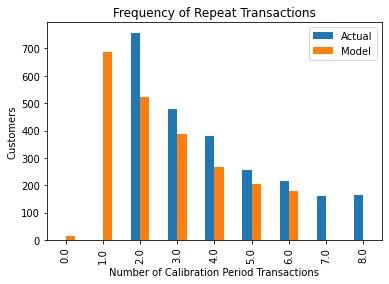

In [321]:
plot_period_transactions(betageo)
plt.show()


---
# **12. Establishment of GAMMA-GAMMA Model**

### **GammaGammaFitter** is a class in the lifetimes package in Python that can be used to estimate the parameters of the Gamma-Gamma submodel of the Pareto/NBD model for customer lifetime value (CLV) analysis. The Gamma-Gamma submodel estimates the distribution of the monetary value of each transaction, given that a customer has made a purchase.In another words it is used **to model the variability in the monetary value of customer transactions, given that a customer has made at least one transaction.**

### To use GammaGammaFitter with a lifetimes dataset,** you first need to fit a BetaGeoFitter model to the dataset to estimate the customer "lifetime" parameters** (i.e., the frequency, recency, and age distributions). 
### Once you have fitted the BetaGeoFitter model, you can use it to estimate the customer expected lifetime value and the conditional expected transaction value for each customer. Then, you can use the GammaGammaFitter class to estimate the parameters of the Gamma-Gamma submodel based on the conditional expected transaction values.

## **Here is a breakdown of the code:**
---

### **ggf = GammaGammaFitter(penalizer_coef=0.01)** The penalizer_coef parameter is **set to a small positive value to prevent overfitting** of the model.

### **ggf.fit(cltv_df['frequency'], cltv_df['monetary'])** fits the GammaGamma model to the dataset. 

### After fitting the GammaGammaFitter model, you can use its **conditional_expected_average_profit()** method to estimate the conditional expected transaction value for each customer, and the **expected_average_profit()** method to estimate the overall expected transaction value.

### Here, **cltv_df['expected_average_profit']** will be a new column in the cltv_df DataFrame that contains the estimated conditional expected transaction value for each customer, and expected_transaction_value will be a scalar value representing the estimated overall expected transaction value.

In [322]:
gamma = GammaGammaFitter(penalizer_coef=0.01)

gamma.fit(cltv_gb['frequency'], cltv_gb['monetary'])

gamma.conditional_expected_average_profit(cltv_gb['frequency'],
                                        cltv_gb['monetary']).head(10)


Customer ID
12346.0000      5.9164
12347.0000    926.0180
12349.0000    669.8791
12352.0000    242.3264
12356.0000   1465.7129
12357.0000   7875.3304
12358.0000   1119.0847
12359.0000    332.5792
12360.0000    286.0845
12361.0000    133.4855
dtype: float64

In [323]:
cltv_gb["expected_average_profit"] = gamma.conditional_expected_average_profit(cltv_gb['frequency'],
                                                                             cltv_gb['monetary'])
cltv_gb.sort_values("expected_average_profit", ascending=False).head(10)


,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit
Customer ID,,,,,,,,
12357.0000,0.0000,55.5714,2,5639.7750,0.0000,0.0001,0.0004,7875.3304
14091.0000,6.2857,99.8571,2,4555.4250,0.0000,0.0001,0.0004,6361.6074
17450.0000,10.0000,62.7143,8,3350.8900,0.0000,0.0000,0.0000,3607.1044
18102.0000,53.2857,105.5714,95,3155.5607,0.0000,0.0000,0.0000,3174.5536
16749.0000,18.8571,103.5714,2,2193.5400,0.0005,0.0018,0.0053,3064.4806
12415.0000,21.7143,75.4286,7,2776.0314,0.0001,0.0002,0.0006,3021.3784
12477.0000,31.8571,89.1429,3,2352.2100,0.0026,0.0102,0.0295,2902.1376
14646.0000,51.7143,105.4286,87,2715.6506,0.0000,0.0000,0.0000,2733.5141
13935.0000,7.8571,93.2857,3,2038.9733,0.0000,0.0001,0.0002,2515.8537


---
# **13. Calculation of CLTV with BG-NBD and Gamma-Gamma Model**

### The **customer_lifetime_value()** method in the GammaGammaFitter class can be used to estimate the customer lifetime value (CLV) of each customer in the dataset based on the Beta-GeoFitter model and the Gamma-Gamma submodel. 

### This method takes as input the fitted Beta-GeoFitter model (bgf), the frequency, recency, and age(T) data for each customer, the monetary value of each transaction (monetary), the time horizon over which to estimate CLV (in this case, 3 months), the frequency of the data (freq), and the discount rate to use in the estimation.

### Here, bgf is the fitted BetaGeoFitter model object, cltv_df['frequency'], cltv_df['recency'], cltv_df['T'], and cltv_df['monetary'] are Pandas Series containing the frequency, recency, age, and monetary data for each customer in the dataset, time=3 specifies that the CLV should be estimated over a 3-month time horizon, freq="W" specifies that the data is in weekly frequency, and discount_rate=0.01 specifies the discount rate to use in the estimation.

In [324]:
cltv = gamma.customer_lifetime_value(betageo,
                                   cltv_gb['frequency'],
                                   cltv_gb['recency'],
                                   cltv_gb['T'],
                                   cltv_gb['monetary'],
                                   time=3,  # 3 aylık
                                   freq="W",  # T'nin frekans bilgisi.
                                   discount_rate=0.01)

cltv.head()

Customer ID
12346.0000    0.0001
12347.0000    3.5030
12349.0000   26.7684
12352.0000    0.3275
12356.0000    1.6622
Name: clv, dtype: float64

In [325]:
cltv = cltv.reset_index()

cltv_final = cltv_gb.merge(cltv, on="Customer ID", how="left")
cltv_final.sort_values(by="clv", ascending=False).head(10)


,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv
95,12557.0000,50.1429,103.2857,4,1681.2950,0.0052,0.0204,0.0591,1960.1402,122.7644
74,12497.0000,40.1429,97.5714,3,1685.4433,0.0040,0.0157,0.0455,2079.8801,100.2747
6,12358.0000,50.8571,104.5714,3,906.3367,0.0069,0.0273,0.0792,1119.0847,94.0750
488,13373.0000,45.2857,104.8571,3,1424.9800,0.0044,0.0173,0.0503,1758.6763,93.8659
63,12477.0000,31.8571,89.1429,3,2352.2100,0.0026,0.0102,0.0295,2902.1376,90.7315
247,12873.0000,40.5714,97.4286,2,826.6500,0.0060,0.0236,0.0687,1156.3395,84.2998
45,12435.0000,48.5714,105.4286,4,1431.8725,0.0039,0.0155,0.0448,1669.4967,79.3326
433,13253.0000,39.0000,100.5714,2,960.3550,0.0047,0.0185,0.0539,1342.9880,76.7695
90,12539.0000,37.8571,102.4286,3,1882.1333,0.0024,0.0096,0.0280,2322.4384,69.0097
16,12377.0000,29.7143,84.2857,2,899.1000,0.0044,0.0175,0.0505,1257.4777,67.3877


# **14. Creating Segments by CLTV**

In [326]:
cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])
cltv_final

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,segment
0,12346.0000,42.0000,103.7143,15,5.4673,0.0000,0.0000,0.0000,5.9164,0.0001,D
1,12347.0000,5.2857,57.8571,2,661.6600,0.0003,0.0013,0.0036,926.0180,3.5030,B
2,12349.0000,46.7143,105.1429,4,574.0275,0.0033,0.0130,0.0377,669.8791,26.7684,A
3,12352.0000,2.2857,56.1429,2,171.9000,0.0001,0.0004,0.0013,242.3264,0.3275,C
4,12356.0000,6.2857,60.7143,3,1187.4167,0.0001,0.0004,0.0011,1465.7129,1.6622,B
...,...,...,...,...,...,...,...,...,...,...,...
3079,18280.0000,1.8571,56.4286,2,145.9250,0.0001,0.0004,0.0010,206.0660,0.2235,C
3080,18283.0000,39.2857,94.1429,6,106.9617,0.0010,0.0038,0.0110,118.7531,1.3884,B
3081,18284.0000,0.2857,61.7143,2,218.1200,0.0000,0.0001,0.0003,306.8483,0.0984,C
3082,18286.0000,35.2857,103.4286,3,395.9967,0.0018,0.0069,0.0201,489.7327,10.4321,A


In [327]:
cltv_final.groupby("segment").agg(
    {"count", "mean", "sum"})

Customer ID                     recency                        T               frequency                  monetary                expected_purc_1_week              expected_purc_1_month              expected_purc_3_month              expected_average_profit                       clv              
                  sum count       mean        sum count    mean        sum count    mean       sum count    mean         sum count     mean                  sum count   mean                   sum count   mean                   sum count   mean                     sum count     mean        sum count    mean
segment                                                                                                                                                                                                                                                                                                            
D       11857143.0000   771 15378.9144 18331.5714   771 23.7764 68664.1429   771 89.0586     11008   771 14.2776 195536.6793   771 253.6144               0.0066   771 0.0000                0.0258   771 0.0000                0.0741   771 0.0001             214028.3816   771 277.5984    11.7892   771  0.0153
C       11775906.0000   771 15273.5486 17079.1429   771 22.1519 64679.7143   771 83.8907      4606   771  5.9741 199578.4464   771 258.8566               0.0829   771 0.0001                0.3259   771 0.0004                0.9361   771 0.0012             238753.0100   771 309.6667   219.4333   771  0.2846
B       11846109.0000   771 15364.6031 22398.8571   771 29.0517 68905.7143   771 89.3719      3822   771  4.9572 241044.7814   771 312.6391               0.5029   771 0.0007                1.9812   771 0.0026                5.7155   771 0.0074             290076.7596   771 376.2344  1409.6331   771  1.8283
A       11815556.0000   771 15324.9754 27711.8571   771 35.9427 72481.1429   771 94.0093      2773   771  3.5966 294482.5707   771 381.9489               2.0699   771 0.0027                8.1683   771 0.0106               23.6616   771 0.0307             364822.6560   771 473.1811 10386.4767   771 13.4714


# **15. Functionalization - II**

In [330]:
def CLTV_BetaGeoGamma(dataframe, month=3):
    # 1. Data Preparation
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    #-------------------------------------------------------------------------------------------------------------------------
    replace_with_thresholds(dataframe, "Quantity") # get rid of outliers
    replace_with_thresholds(dataframe, "Price")    # get rid of outliers
    #-------------------------------------------------------------------------------------------------------------------------
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    today_date = dt.datetime(2011, 12, 11)
    #-------------------------------------------------------------------------------------------------------------------------
    cltv_gb = dataframe.groupby('Customer ID').agg(
        {'InvoiceDate': [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days,
                         lambda InvoiceDate: (today_date - InvoiceDate.min()).days],
         'Invoice':      lambda Invoice: Invoice.nunique(),
         'TotalPrice':   lambda TotalPrice: TotalPrice.sum()})

    cltv_gb.columns = cltv_gb.columns.droplevel(0)  # The resulting column will have a single level of column headers.
    cltv_gb.columns = ['recency', 'T', 'frequency', 'monetary']
    cltv_gb["monetary"] = cltv_gb["monetary"] / cltv_gb["frequency"]
    cltv_gb = cltv_gb[(cltv_gb['frequency'] > 1)]
    cltv_gb["recency"] = cltv_gb["recency"] / 7
    cltv_gb["T"] = cltv_gb["T"] / 7
    #-------------------------------------------------------------------------------------------------------------------------
    # 2. Establishment of BG-NBD Model
    betageo = BetaGeoFitter(penalizer_coef=0.001)
    betageo.fit(cltv_gb['frequency'],
            cltv_gb['recency'],
            cltv_gb['T'])

    cltv_gb["expected_purc_1_week"] = betageo.predict(1,
                                                  cltv_gb['frequency'],
                                                  cltv_gb['recency'],
                                                  cltv_gb['T'])

    cltv_gb["expected_purc_1_month"] = betageo.predict(4,
                                                   cltv_gb['frequency'],
                                                   cltv_gb['recency'],
                                                   cltv_gb['T'])

    cltv_gb["expected_purc_3_month"] = betageo.predict(12,
                                                   cltv_gb['frequency'],
                                                   cltv_gb['recency'],
                                                   cltv_gb['T'])
    #-------------------------------------------------------------------------------------------------------------------------
    # 3. Establishing the GAMMA-GAMMA Model
    gamma = GammaGammaFitter(penalizer_coef=0.01)
    gamma.fit(cltv_gb['frequency'], cltv_gb['monetary'])
    cltv_gb["expected_average_profit"] = gamma.conditional_expected_average_profit(cltv_gb['frequency'],
                                                                                 cltv_gb['monetary'])
    #-------------------------------------------------------------------------------------------------------------------------
    # 4. Calculation of CLTV with BG-NBD and GG model
    cltv = gamma.customer_lifetime_value(betageo,
                                       cltv_gb['frequency'],
                                       cltv_gb['recency'],
                                       cltv_gb['T'],
                                       cltv_gb['monetary'],
                                       time=month,             # 3 month
                                       freq="W",               # Frequency information of T
                                       discount_rate=0.01)
    #-------------------------------------------------------------------------------------------------------------------------
    # 5. Creating Segments by CLTV
    cltv = cltv.reset_index()
    cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
    cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

    return cltv_final



In [331]:
df = df_.copy()
cltv_final2 = CLTV_BetaGeoGamma(df)
cltv_final2

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,segment
0,12346.0000,42.0000,103.7143,15,5.4673,0.0000,0.0000,0.0000,5.9164,0.0002,D
1,12347.0000,5.2857,57.8571,2,661.6600,0.0003,0.0013,0.0036,926.0180,3.2751,B
2,12349.0000,46.7143,105.1429,4,574.0275,0.0033,0.0130,0.0377,669.8791,13.7464,A
3,12352.0000,2.2857,56.1429,2,171.9000,0.0001,0.0004,0.0013,242.3264,0.3763,C
4,12356.0000,6.2857,60.7143,3,1187.4167,0.0001,0.0004,0.0011,1465.7129,1.9081,B
...,...,...,...,...,...,...,...,...,...,...,...
3079,18280.0000,1.8571,56.4286,2,145.9250,0.0001,0.0004,0.0010,206.0660,NaN,NaN
3080,18283.0000,39.2857,94.1429,6,106.9617,0.0010,0.0038,0.0110,118.7531,1.2207,C
3081,18284.0000,0.2857,61.7143,2,218.1200,0.0000,0.0001,0.0003,306.8483,NaN,NaN
3082,18286.0000,35.2857,103.4286,3,395.9967,0.0018,0.0069,0.0201,489.7327,22.4203,A


In [ ]:
cltv_final2.to_csv("cltv_prediction.csv")